In [1]:
%matplotlib inline
from config_calc import *
import pandas as pd

import cesm_orcas_sci as cesm
import cam
import gv
import metpy.calc as mcalc

import colorbrewer

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['mathtext.default']='regular'

import cartopy.crs as ccrs

In [2]:
df_chc2mcm = pd.read_csv('scargo_data/SCARGO_MCM_North.out',delimiter=' ')
df_mcm2spo = pd.read_csv('scargo_data/SCARGO_MCMtoSPO.out',delimiter=' ')
df_ch2mm = pd.read_csv('scargo_data/SCARGO_CHtoMM.out',delimiter=' ')
df_chc2mcm

,alt2,min,phase,gs,dist,fb,fuel,lat,lon,hdg
0,1.0000,0.000000,1,0.0000,0.000000,0.000,0.00000,-77.85390,166.4686,6
1,101.0000,0.166667,1,192.7430,0.534976,6025.140,16.74492,-77.84503,166.4730,6
2,201.0000,0.166667,1,193.0567,0.535848,6018.865,16.72749,-77.83615,166.4775,6
3,301.0000,0.166667,1,193.3705,0.536719,6012.591,16.71007,-77.82725,166.4819,6
4,401.0000,0.166667,1,193.6842,0.537590,6006.316,16.69264,-77.81834,166.4863,6
5,501.0000,0.166667,1,193.9979,0.538462,6000.042,16.67521,-77.80942,166.4908,6
6,601.0000,0.166667,1,194.3116,0.539333,5993.767,16.65778,-77.80048,166.4952,6
7,701.0000,0.166667,1,194.6254,0.540205,5987.493,16.64035,-77.79152,166.4997,6
8,801.0000,0.166667,1,194.9391,0.541076,5981.218,16.62292,-77.78256,166.5041,6
9,901.0000,0.166667,1,195.2528,0.541948,5974.944,16.60549,-77.77357,166.5086,6


In [3]:
%%time
case = 'bgeos5.B20TRC5CN.f09_g16.BPRD_orcas_sci.004'

tracer_def = cesm.trace_gas_tracers(case)
tracer_3d = [k for k in tracer_def]
varlist = ['CO2_OCN','Z3','theta','Pm','Pi'] 

ds = cesm.open_casedata(case,'atm','cam.h0',varlist,transformed='170E')
ds = xr.merge((ds,cesm.open_casedata(case,'atm','cam.h0',['SF'+v for v in tracer_3d if 'CO2' in v],
                                     transformed='so_ocean_mean')))
ds = cesm.convert_dataset(ds,case)
ds.info()

xarray.Dataset {
dimensions:
	ilev = 57 ;
	lat = 64 ;
	lev = 56 ;
	nbnd = 2 ;
	slat = 191 ;
	slon = 288 ;
	time = 3347 ;

variables:
	float32 CO2_OCN(time, lev, lat) ;
		CO2_OCN:mdims = 1 ;
		CO2_OCN:units = ppmv ;
		CO2_OCN:long_name = CO2_OCN ;
		CO2_OCN:cell_methods = time: mean ;
	float64 P0() ;
		P0:long_name = reference pressure ;
		P0:units = Pa ;
	float64 ch4vmr(time) ;
		ch4vmr:long_name = ch4 volume mixing ratio ;
	float64 co2vmr(time) ;
		co2vmr:long_name = co2 volume mixing ratio ;
	float64 f11vmr(time) ;
		f11vmr:long_name = f11 volume mixing ratio ;
	float64 f12vmr(time) ;
		f12vmr:long_name = f12 volume mixing ratio ;
	float64 gw(lat) ;
		gw:long_name = gauss weights ;
	float64 hyai(ilev) ;
		hyai:long_name = hybrid A coefficient at layer interfaces ;
	float64 hyam(lev) ;
		hyam:long_name = hybrid A coefficient at layer midpoints ;
	float64 hybi(ilev) ;
		hybi:long_name = hybrid B coefficient at layer interfaces ;
	float64 hybm(lev) ;
		hybm:long_name = hybrid B coeffici

In [4]:
co2_vars = [v for v in ds.variables if any(vv in v for vv in ['CO2_OCN','CO2_T09','CO2_L14C']) and 'SF' not in v]
co2_vars

[u'CO2_OCN',
 u'CO2_T09',
 u'CO2_T09a',
 u'CO2_T09b',
 u'CO2_T09c',
 u'CO2_T09d',
 u'CO2_T09e',
 u'CO2_T09f',
 u'CO2_T09g',
 u'CO2_T09h',
 u'CO2_T09i',
 u'CO2_T09j',
 u'CO2_T09k',
 u'CO2_T09l',
 u'CO2_L14C']

Make some plots of timeseries in the model bottom level.

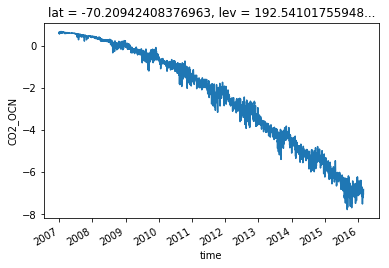

In [5]:
ds.CO2_OCN.isel(lev=25).sel(lat=-70,method='nearest').plot()

In [6]:
ds.lev.isel(lev=30).values

array(393.75010133)

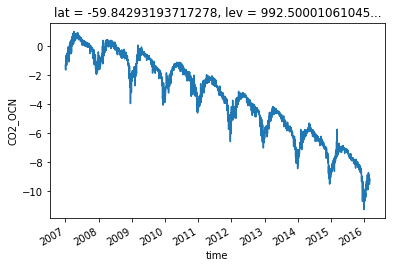

In [7]:
ds.CO2_OCN.isel(lev=-1).sel(lat=-60,method='nearest').plot()

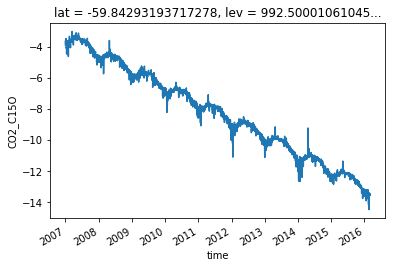

In [8]:
ds.CO2_C15O.isel(lev=-1).sel(lat=-60,method='nearest').plot()

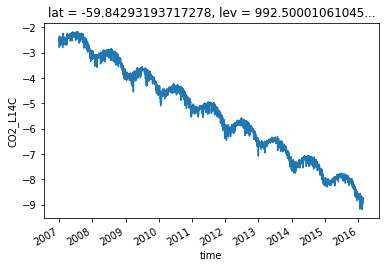

In [9]:
ds.CO2_L14C.isel(lev=-1).sel(lat=-60,method='nearest').plot()

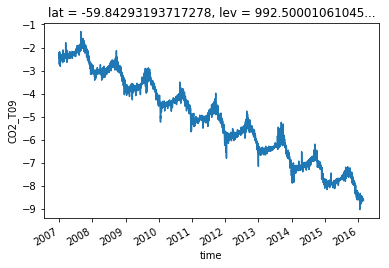

In [10]:
ds.CO2_T09.isel(lev=-1).sel(lat=-60,method='nearest').plot()

### detrend
Use harmonic plus trend fit to data to compute drift.

In [11]:
x = (((ds.time - ds.time[0]) / np.timedelta64(1,'D')).astype(float).values)/365.
x

array([0.00000000e+00, 2.73972603e-03, 5.47945205e-03, ...,
       9.16164384e+00, 9.16438356e+00, 9.16712329e+00])

Develop the model and test it at a point

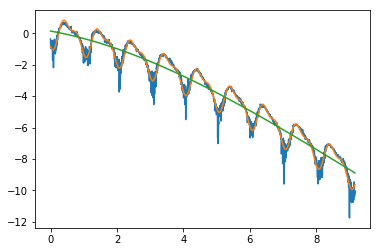

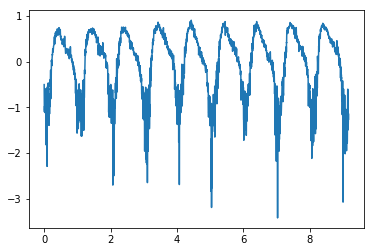

In [12]:
from scipy.optimize import curve_fit

#-- define the model
func = lambda t,mu,trend,trend2,trend3,amp1,phase1,amp2,phase2: (
    mu + trend * t + trend2 * t**2 + trend3 * t**3 + 
    amp1 * np.cos(1.*2.*np.pi*t + phase1) + 
    amp2 * np.cos(2.*2.*np.pi*t + phase2)) 

last_trend_parm = 4

y = ds.CO2_OCN.isel(lev=-1).sel(lat=-70,method='nearest').values

#-- fit the model
abcd, pcov = curve_fit(func,x,y)
abcd_nocycle = abcd.copy()
abcd_nocycle[last_trend_parm:] = 0.
    
#-- plot the fit
plt.figure()
plt.plot(x,y)
plt.plot(x,func(x,*abcd))
plt.plot(x,func(x,*abcd_nocycle))

plt.figure()
plt.plot(x,y - func(x,*abcd_nocycle))

In [13]:
%%time
trend_model_file = os.path.join(diro['work'],'.'.join([case,'co2_vars','detrended','nc']))
if os.path.exists(trend_model_file):
    ds_trend_model = xr.open_dataset(trend_model_file)
else:    
    ds_trend_model = xr.Dataset()
    for v in co2_vars:
        print(v)
        ds_trend_model[v+'_model_fit'] = ds[v].copy()
        ds_trend_model[v+'_detrended'] = ds[v].copy()

        for j in range(len(ds.lat)):
            for k in range(len(ds.lev)):        

                y = ds[v].isel(lat=j,lev=k).values

                #-- fit the model
                abcd, pcov = curve_fit(func,x,y)
                abcd_nocycle = abcd.copy()
                abcd_nocycle[last_trend_parm:] = 0.

                ds_trend_model[v+'_model_fit'].values[:,k,j] = func(x,*abcd)
                ds_trend_model[v+'_detrended'].values[:,k,j] = ds[v].values[:,k,j] - func(x,*abcd_nocycle)
                
    ds_trend_model.to_netcdf(trend_model_file)
    
ds = xr.merge((ds,ds_trend_model))

CPU times: user 72 ms, sys: 10 ms, total: 82 ms
Wall time: 571 ms


In [14]:
ds

<xarray.Dataset>
Dimensions:             (ilev: 57, lat: 64, lev: 56, nbnd: 2, slat: 191, slon: 288, time: 3347)
Coordinates:
  * ilev                (ilev) float64 1.651 2.085 2.62 3.276 4.077 5.047 ...
  * lat                 (lat) float64 -90.0 -89.06 -88.12 -87.17 -86.23 ...
  * lev                 (lev) float64 1.868 2.353 2.948 3.677 4.562 5.632 ...
    lon                 float64 170.0
  * slat                (slat) float64 -89.53 -88.59 -87.64 -86.7 -85.76 ...
  * slon                (slon) float64 -0.625 0.625 1.875 3.125 4.375 5.625 ...
  * time                (time) datetime64[ns] 2007-01-01 2007-01-02 ...
Dimensions without coordinates: nbnd
Data variables:
    CO2_OCN             (time, lev, lat) float32 0.0041001504 0.0041001504 ...
    P0                  float64 1e+05
    ch4vmr              (time) float64 1.757e-06 1.757e-06 1.757e-06 ...
    co2vmr              (time) float64 0.0003818 0.0003818 0.0003818 ...
    f11vmr              (time) float64 7.183e-10 7.183e-10 

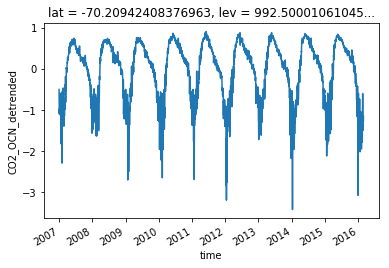

In [15]:
ds.CO2_OCN_detrended.isel(lev=-1).sel(lat=-70,method='nearest').plot()

### put data on height coordinate

In [16]:
%%time
geopotential_height_levels = xr.DataArray(
        np.array([ 42482.4296875,40789.765625,39157.46875,
                   37586.35546875,36074.7578125,34620.71875,
                   33221.05078125,31872.421875,30571.47265625,
                   29308.29492188,28075.45507812,26870.96875,
                   25694.5390625,24545.7109375,23423.09570312,
                   22326.65625,21252.5234375,20197.5078125,
                   19162.2578125,18146.8984375,17149.96484375,
                   16160.68554688,15167.20898438,14164.18066406,
                   13147.97851562,12116.08984375,11066.44824219,
                   9995.7109375,8912.61816406,8007.54882812,
                   7296.19238281,6637.14892578,6022.51513672,
                   5446.35351562,4903.87304688,4391.23974609,
                   3905.2668457,3443.27319336,3074.66967773,
                   2790.08691406,2513.83837891,2245.44848633,
                   1984.4967041,1755.61950684,1581.37988281,
                   1434.59033203,1290.03381348,1147.62548828,
                   1007.2913208,868.96289062,732.5602417,
                   598.00524902,465.22851562,334.16360474,
                   204.7640686,77.2164535]),
        dims=('zlev'),
        attrs={'long_name':'Geopotential height (above sea level)',
               'units':'m'})

dsh = cam.remap_vertical_coord(ds.Z3,*[ds[v] for v in varlist+[vv+'_detrended' for vv in co2_vars]],
                               new_levels=geopotential_height_levels)
dsh.zlev.values = dsh.zlev.values * 1e-3
dsh

interpolating CO2_OCN


/glade/p/work/mclong/miniconda2/envs/py2/lib/python2.7/site-packages/metpy/calc/tools.py:692: UserWarning: Interpolation point out of data bounds encountered
  warnings.warn('Interpolation point out of data bounds encountered')
/glade/p/work/mclong/miniconda2/envs/py2/lib/python2.7/site-packages/metpy/calc/tools.py:702: UserWarning: Interpolation point out of data bounds encountered
  warnings.warn('Interpolation point out of data bounds encountered')


interpolating Z3
interpolating theta
interpolating Pm
interpolating CO2_CROF
interpolating CO2_LND
interpolating CO2_T09
interpolating CO2_T09a
interpolating CO2_T09b
interpolating CO2_T09c
interpolating CO2_T09d
interpolating CO2_T09e
interpolating CO2_T09f
interpolating CO2_T09g
interpolating CO2_T09h
interpolating CO2_T09i
interpolating CO2_T09j
interpolating CO2_T09k
interpolating CO2_T09l
interpolating CO2_OCN
interpolating CO2_CROT
interpolating CO2_L14C
interpolating CO2_CRPO
interpolating CO2_CROL
interpolating CO2_CROO
interpolating CO2_C15T
interpolating CO2
interpolating CO2_FFF
interpolating IDL_T000
interpolating IDL_T001
interpolating IDL_T002
interpolating IDL_T003
interpolating IDL_T004
interpolating IDL_T005
interpolating IDL_T006
interpolating IDL_S005
interpolating IDL_S004
interpolating CO2_C15F
interpolating IDL_S006
interpolating IDL_S001
interpolating IDL_S003
interpolating IDL_S002
interpolating CO2_C15L
interpolating CO2_C15O
interpolating CO2_OCN_detrended
int

In [17]:
dsh['SFCO2_OCN'] = ds.SFCO2_OCN
dsh['SO_AIR'] = dsh.IDL_S005+dsh.IDL_S006
dsh

<xarray.Dataset>
Dimensions:             (ilev: 57, lat: 64, time: 3347, zlev: 56)
Coordinates:
  * lat                 (lat) float64 -90.0 -89.06 -88.12 -87.17 -86.23 ...
  * time                (time) datetime64[ns] 2007-01-01 2007-01-02 ...
  * ilev                (ilev) float64 1.651 2.085 2.62 3.276 4.077 5.047 ...
    lon                 float64 170.0
  * zlev                (zlev) float64 42.48 40.79 39.16 37.59 36.07 34.62 ...
Data variables:
    CO2_T09d_detrended  (time, zlev, lat) float64 0.09792 0.09789 0.09805 ...
    CO2_T09k            (time, zlev, lat) float64 -0.0804 -0.08039 -0.08039 ...
    CO2_T09e_detrended  (time, zlev, lat) float64 0.1003 0.1003 0.1004 ...
    CO2_T09i_detrended  (time, zlev, lat) float64 0.1029 0.1029 0.1031 ...
    CO2_T09g_detrended  (time, zlev, lat) float64 0.1016 0.1016 0.1017 ...
    CO2_T09k_detrended  (time, zlev, lat) float64 0.1069 0.1068 0.107 0.1072 ...
    CO2_C15O            (time, zlev, lat) float64 -0.08072 -0.08071 -0.08069 ...


In [18]:
dsc = dsh.groupby('time.month').mean(dim='time')
dsc

<xarray.Dataset>
Dimensions:             (ilev: 57, lat: 64, month: 12, zlev: 56)
Coordinates:
  * lat                 (lat) float64 -90.0 -89.06 -88.12 -87.17 -86.23 ...
  * ilev                (ilev) float64 1.651 2.085 2.62 3.276 4.077 5.047 ...
  * zlev                (zlev) float64 42.48 40.79 39.16 37.59 36.07 34.62 ...
  * month               (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    CO2_T09d_detrended  (month, zlev, lat) float64 -0.05514 -0.05473 ...
    CO2_T09k            (month, zlev, lat) float64 -1.631 -1.631 -1.631 ...
    CO2_T09e_detrended  (month, zlev, lat) float64 -0.05661 -0.05619 ...
    CO2_T09i_detrended  (month, zlev, lat) float64 -0.05789 -0.05745 ...
    CO2_T09g_detrended  (month, zlev, lat) float64 -0.05725 -0.05682 ...
    CO2_T09k_detrended  (month, zlev, lat) float64 -0.0598 -0.05935 -0.05866 ...
    CO2_C15O            (month, zlev, lat) float64 -2.403 -2.403 -2.403 ...
    CO2_LND             (month, zlev, lat) float64 0.8904 0.8905 0

Compute Jan-Feb means

In [19]:
year = np.unique(dsh['time.year'].values)
dshm = []
dsm = []
for y in year:
    nx = np.where((ds['time.month']<=2)&(ds['time.year']==y))[0]
    dshm.append(dsh.isel(time=nx).mean(dim='time'))   
    dsm.append(ds.isel(time=nx).mean(dim='time'))       
    
dsm = xr.concat(dsm,dim='time')
dshm = xr.concat(dshm,dim='time')
dsm['time'] = ds.resample(time='A-Feb').mean().time
dshm['time'] = dsh.resample(time='A-Feb').mean().time

dshm.info()
dsm.info()


xarray.Dataset {
dimensions:
	ilev = 57 ;
	lat = 64 ;
	time = 10 ;
	zlev = 56 ;

variables:
	datetime64[ns] time(time) ;
	float64 lat(lat) ;
		lat:long_name = latitude ;
		lat:units = degrees_north ;
	float64 ilev(ilev) ;
		ilev:long_name = hybrid level at interfaces (1000*(A+B)) ;
		ilev:units = hPa ;
		ilev:positive = down ;
		ilev:standard_name = atmosphere_hybrid_sigma_pressure_coordinate ;
		ilev:formula_terms = a: hyai b: hybi p0: P0 ps: PS ;
	float64 zlev(zlev) ;
		zlev:units = m ;
		zlev:long_name = Geopotential height (above sea level) ;
	float64 CO2_T09d_detrended(time, zlev, lat) ;
	float64 CO2_T09k(time, zlev, lat) ;
	float64 CO2_T09e_detrended(time, zlev, lat) ;
	float64 CO2_T09i_detrended(time, zlev, lat) ;
	float64 CO2_T09g_detrended(time, zlev, lat) ;
	float64 CO2_T09k_detrended(time, zlev, lat) ;
	float64 CO2_C15O(time, zlev, lat) ;
	float64 CO2_LND(time, zlev, lat) ;
	float64 CO2_L14C_detrended(time, zlev, lat) ;
	float64 Pi(time, ilev, lat) ;
	float64 CO2_T09f_detren

Plot climatological section

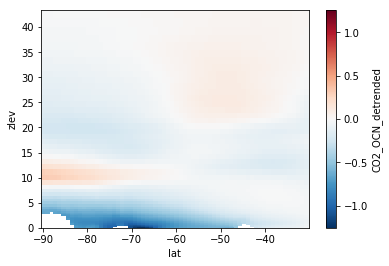

In [20]:
dsc.CO2_OCN_detrended.isel(month=slice(0,2)).mean('month').plot()

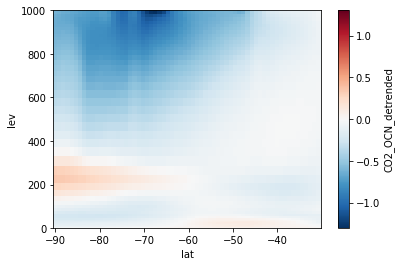

In [21]:
dsm.CO2_OCN_detrended.mean('time').plot()

<xarray.DataArray 'CO2_OCN_detrended' ()>
array(0.511142)
Coordinates:
    lon      float64 170.0


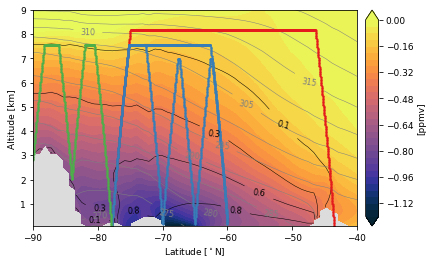

In [51]:
import plot_tools
import colorbrewer
import cmocean

v = 'CO2_OCN_detrended'

fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0.1,0.1,0.75,0.75])

#ax.minorticks_on()
#ax.tick_params(which='major',direction='out',width=1,  length=6)
#ax.tick_params(which='minor',direction='out',width=0.5,length=4)

levels = plot_tools.nice_levels(-1.2,0.0,40,outside=False)
print(np.max(dsh[v].mean(dim='time')))


ax.set_facecolor('gainsboro')

cf = ax.contourf(dshm.lat, dshm.zlev, dshm[v].mean(dim='time'),
                 levels=levels,
                 cmap = cmocean.cm.thermal, #'viridis',
                 extend='both')

cs = ax.contour(dshm.lat, dshm.zlev, dshm.SO_AIR.mean(dim='time'),
                 levels = np.arange(0.1,1.,0.25),
                 colors = 'black',
                 linewidths = 0.5)
cs.levels = [plot_tools.contour_label_format(val) for val in cs.levels]
fmt = '%r'
lb = plt.clabel(cs, fontsize=8,
                inline = True,
                fmt=fmt)

cs = ax.contour(dshm.lat, dshm.zlev, dshm.theta.mean(dim='time'),
                 levels = np.arange(240.,380,5.),
                 colors = 'gray',
                 linewidths = 0.5)
cs.levels = [plot_tools.contour_label_format(val) for val in cs.levels]
fmt = '%r'
lb = plt.clabel(cs, fontsize=8,
                inline = True,
                fmt=fmt)


color = colorbrewer.qualitative8y()
pl = plt.plot(df_ch2mm.lat,df_ch2mm.alt2/3.3/1000.,'.',markersize=2,color=color[0])
pl = plt.plot(df_chc2mcm.lat,df_chc2mcm.alt2/3.3/1000.,'.',markersize=2,color=color[1])
pl = plt.plot(df_mcm2spo.lat,df_mcm2spo.alt2/3.3/1000.,'.',markersize=2,color=color[2])

cbax = fig.add_axes([0.87,0.1,0.03,0.75])
cb = plt.colorbar(cf,cax=cbax)
cb.set_label('['+dsh[v].attrs['units']+']')

ax.set_xlim([-90.,-40.])
ax.set_ylim([dsh.zlev[-1],9.])

ax.set_xlabel('Latitude [$^\circ$N]')
ax.set_ylabel('Altitude [km]')

plt.savefig(os.path.join(diro['fig'],'scargo-xsection-co2-ocn-tracers.pdf'),dpi=300,bbox_inches='tight',
           transparent=True)


<xarray.DataArray 'CO2_T09_detrended' ()>
array(0.190114)
Coordinates:
    lon      float64 170.0


/glade/p/work/mclong/miniconda2/envs/py2/lib/python2.7/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewi'
  s)


Text(0,0.5,'Altitude [km]')

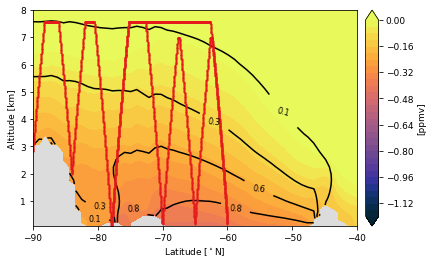

In [23]:
import plot_tools
import colorbrewer
import cmocean

v = 'CO2_T09_detrended'

fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0.1,0.1,0.75,0.75])

#ax.minorticks_on()
#ax.tick_params(which='major',direction='out',width=1,  length=6)
#ax.tick_params(which='minor',direction='out',width=0.5,length=4)

levels = plot_tools.nice_levels(-1.2,0.0,40,outside=False)
print(np.max(dsh[v].mean(dim='time')))


ax.set_facecolor('gainsboro')

cf = ax.contourf(dshm.lat, dshm.zlev, dshm[v].mean(dim='time'),
                 levels=levels,
                 cmap = cmocean.cm.thermal, #'viridis',
                 extend='both')

cs = ax.contour(dshm.lat, dshm.zlev, dshm.SO_AIR.mean(dim='time'),
                 levels = np.arange(0.1,1.,0.25),
                 colors = 'black',
                 linewi = 0.1)
cs.levels = [plot_tools.contour_label_format(val) for val in cs.levels]
fmt = '%r'
lb = plt.clabel(cs, fontsize=8,
                inline = True,
                fmt=fmt)

color = colorbrewer.qualitative8y()
pl = plt.plot(df_chc2mcm.lat,df_chc2mcm.alt2/3.3/1000.,'.',markersize=2,color=color[0])
pl = plt.plot(df_mcm2spo.lat,df_mcm2spo.alt2/3.3/1000.,'.',markersize=2,color=color[0])

cbax = fig.add_axes([0.87,0.1,0.03,0.75])
cb = plt.colorbar(cf,cax=cbax)
cb.set_label('['+dsh[v].attrs['units']+']')

ax.set_xlim([-90.,-40.])
ax.set_ylim([dsh.zlev[-1],8.])

ax.set_xlabel('Latitude [$^\circ$N]')
ax.set_ylabel('Altitude [km]')


<xarray.DataArray 'CO2_L14C_detrended' ()>
array(0.184396)
Coordinates:
    lon      float64 170.0


Text(0,0.5,'Altitude [km]')

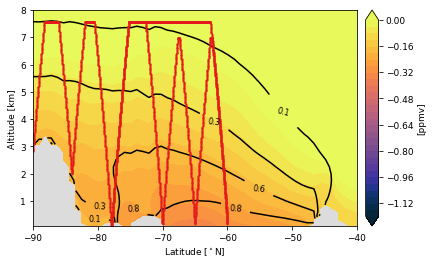

In [24]:
import plot_tools
import colorbrewer
import cmocean

v = 'CO2_L14C_detrended'

fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0.1,0.1,0.75,0.75])

#ax.minorticks_on()
#ax.tick_params(which='major',direction='out',width=1,  length=6)
#ax.tick_params(which='minor',direction='out',width=0.5,length=4)

levels = plot_tools.nice_levels(-1.2,0.0,40,outside=False)
print(np.max(dsh[v].mean(dim='time')))


ax.set_facecolor('gainsboro')

cf = ax.contourf(dshm.lat, dshm.zlev, dshm[v].mean(dim='time'),
                 levels=levels,
                 cmap = cmocean.cm.thermal, #'viridis',
                 extend='both')

cs = ax.contour(dshm.lat, dshm.zlev, dshm.SO_AIR.mean(dim='time'),
                 levels = np.arange(0.1,1.,0.25),
                 colors = 'black',
                 linewi = 0.1)
cs.levels = [plot_tools.contour_label_format(val) for val in cs.levels]
fmt = '%r'
lb = plt.clabel(cs, fontsize=8,
                inline = True,
                fmt=fmt)

color = colorbrewer.qualitative8y()
pl = plt.plot(df_chc2mcm.lat,df_chc2mcm.alt2/3.3/1000.,'.',markersize=2,color=color[0])
pl = plt.plot(df_mcm2spo.lat,df_mcm2spo.alt2/3.3/1000.,'.',markersize=2,color=color[0])

cbax = fig.add_axes([0.87,0.1,0.03,0.75])
cb = plt.colorbar(cf,cax=cbax)
cb.set_label('['+dsh[v].attrs['units']+']')

ax.set_xlim([-90.,-40.])
ax.set_ylim([dsh.zlev[-1],8.])

ax.set_xlabel('Latitude [$^\circ$N]')
ax.set_ylabel('Altitude [km]')


Text(0,0.5,'Altitude [km]')

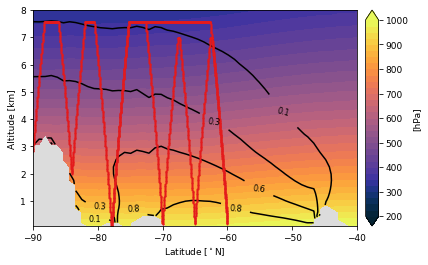

In [25]:
import plot_tools
import colorbrewer
import cmocean

v = 'Pm'

fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0.1,0.1,0.75,0.75])

#ax.minorticks_on()
#ax.tick_params(which='major',direction='out',width=1,  length=6)
#ax.tick_params(which='minor',direction='out',width=0.5,length=4)

levels = plot_tools.nice_levels(200.,1015.,40,outside=False)

ax.set_facecolor('gainsboro')

cf = ax.contourf(dshm.lat, dshm.zlev, dshm[v].mean(dim='time'),
                 levels=levels,
                 cmap = cmocean.cm.thermal, #'viridis',
                 extend='both')

cs = ax.contour(dshm.lat, dshm.zlev, dshm.SO_AIR.mean(dim='time'),
                 levels = np.arange(0.1,1.,0.25),
                 colors = 'black',
                 linewi = 0.1)
cs.levels = [plot_tools.contour_label_format(val) for val in cs.levels]
fmt = '%r'
lb = plt.clabel(cs, fontsize=8,
                inline = True,
                fmt=fmt)

color = colorbrewer.qualitative8y()
pl = plt.plot(df_chc2mcm.lat,df_chc2mcm.alt2/3.3/1000.,'.',markersize=2,color=color[0])
pl = plt.plot(df_mcm2spo.lat,df_mcm2spo.alt2/3.3/1000.,'.',markersize=2,color=color[0])

cbax = fig.add_axes([0.87,0.1,0.03,0.75])
cb = plt.colorbar(cf,cax=cbax)
cb.set_label('['+dsh[v].attrs['units']+']')

ax.set_xlim([-90.,-40.])
ax.set_ylim([dsh.zlev[-1],8.])

ax.set_xlabel('Latitude [$^\circ$N]')
ax.set_ylabel('Altitude [km]')


<xarray.DataArray 'SO_AIR' ()>
array(0.998008)
Coordinates:
    lon      float64 170.0


Text(0,0.5,'Altitude [km]')

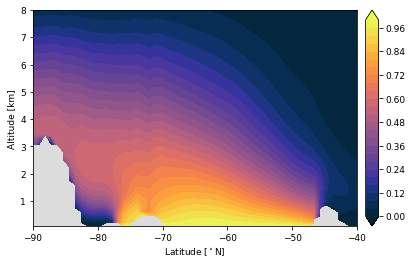

In [26]:
v = 'SO_AIR'

fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0.1,0.1,0.75,0.75])

#ax.minorticks_on()
#ax.tick_params(which='major',direction='out',width=1,  length=6)
#ax.tick_params(which='minor',direction='out',width=0.5,length=4)

ax.set_facecolor('gainsboro')

levels = plot_tools.nice_levels(0.,1.0,40,outside=False)
print(np.max(dsh[v].mean(dim='time')))
cf = ax.contourf(dsc.lat, dsc.zlev, dshm.SO_AIR.mean(dim='time'),
                 levels=levels,
                 cmap = cmocean.cm.thermal, #'viridis',
                 extend='both')

color = colorbrewer.qualitative8y()

cbax = fig.add_axes([0.87,0.1,0.03,0.75])
cb = plt.colorbar(cf,cax=cbax)
#cb.set_label('['+dsh[v].attrs['units']+']')

ax.set_xlim([-90.,-40.])
ax.set_ylim([dsh.zlev[-1],8.])

ax.set_xlabel('Latitude [$^\circ$N]')
ax.set_ylabel('Altitude [km]')


Text(0,0.5,'Altitude [km]')

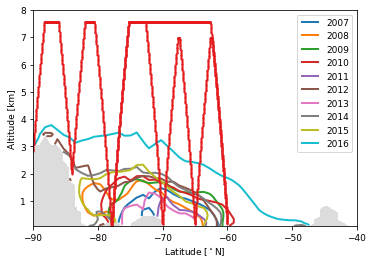

In [27]:
import plot_tools
import colorbrewer
import cmocean
from matplotlib.colors import LinearSegmentedColormap

mpl.rcParams['contour.negative_linestyle'] = 'solid'

v = 'CO2_OCN_detrended'

fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0.1,0.1,0.75,0.75])

#ax.minorticks_on()
#ax.tick_params(which='major',direction='out',width=1,  length=6)
#ax.tick_params(which='minor',direction='out',width=0.5,length=4)

cm = LinearSegmentedColormap.from_list(
        'white', [(1.,1.,1.),(1.,1.,1.)], N=1)

cf = ax.contourf(dshm.lat, dshm.zlev, dshm.SO_AIR.mean(dim='time'),
                 levels=levels,
                 cmap = cm, #'viridis',
                 extend='both')

cs = []
for l in range(len(dsm.time)):
    cs.append(ax.contour(dshm.lat, dshm.zlev, dshm[v].isel(time=l),
                            levels = np.array([-0.8]),
                            colors = 'C%d'%l,
                            linewidths = 2))
ax.legend([c.collections[0] for c in cs],['%d'%dshm['time.year'][l] for l in range(len(dshm.time))])

ax.set_facecolor('gainsboro')

color = colorbrewer.qualitative8y()
pl = plt.plot(df_chc2mcm.lat,df_chc2mcm.alt2/3.3/1000.,'.',markersize=2,color=color[0])
pl = plt.plot(df_mcm2spo.lat,df_mcm2spo.alt2/3.3/1000.,'.',markersize=2,color=color[0])

ax.set_xlim([-90.,-40.])
ax.set_ylim([dsh.zlev[-1],8.])

ax.set_xlabel('Latitude [$^\circ$N]')
ax.set_ylabel('Altitude [km]')


Text(0,0.5,'Altitude [km]')

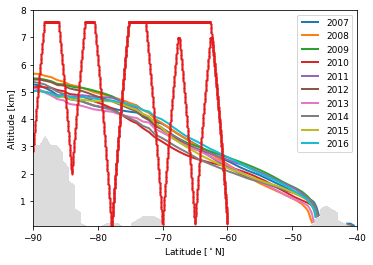

In [28]:
import plot_tools
import colorbrewer
import cmocean
from matplotlib.colors import LinearSegmentedColormap

mpl.rcParams['contour.negative_linestyle'] = 'solid'

v = 'theta'

fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0.1,0.1,0.75,0.75])

#ax.minorticks_on()
#ax.tick_params(which='major',direction='out',width=1,  length=6)
#ax.tick_params(which='minor',direction='out',width=0.5,length=4)

cm = LinearSegmentedColormap.from_list(
        'white', [(1.,1.,1.),(1.,1.,1.)], N=1)

cf = ax.contourf(dshm.lat, dshm.zlev, dshm.SO_AIR.mean(dim='time'),
                 levels=levels,
                 cmap = cm, #'viridis',
                 extend='both')

cs = []
for l in range(len(dsm.time)):
    cs.append(ax.contour(dshm.lat, dshm.zlev, dshm[v].isel(time=l),
                            levels = np.array([290.]),
                            colors = 'C%d'%l,
                            linewidths = 2))
ax.legend([c.collections[0] for c in cs],['%d'%dshm['time.year'][l] for l in range(len(dshm.time))])

ax.set_facecolor('gainsboro')

color = colorbrewer.qualitative8y()
pl = plt.plot(df_chc2mcm.lat,df_chc2mcm.alt2/3.3/1000.,'.',markersize=2,color=color[0])
pl = plt.plot(df_mcm2spo.lat,df_mcm2spo.alt2/3.3/1000.,'.',markersize=2,color=color[0])

ax.set_xlim([-90.,-40.])
ax.set_ylim([dsh.zlev[-1],8.])

ax.set_xlabel('Latitude [$^\circ$N]')
ax.set_ylabel('Altitude [km]')


Text(0,0.5,'Altitude [km]')

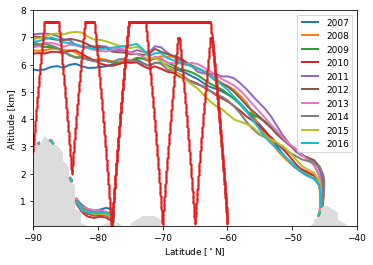

In [29]:
import plot_tools
import colorbrewer
import cmocean
from matplotlib.colors import LinearSegmentedColormap

mpl.rcParams['contour.negative_linestyle'] = 'solid'

v = 'SO_AIR'

fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0.1,0.1,0.75,0.75])

#ax.minorticks_on()
#ax.tick_params(which='major',direction='out',width=1,  length=6)
#ax.tick_params(which='minor',direction='out',width=0.5,length=4)

cm = LinearSegmentedColormap.from_list(
        'white', [(1.,1.,1.),(1.,1.,1.)], N=1)

cf = ax.contourf(dshm.lat, dshm.zlev, dshm.SO_AIR.mean(dim='time'),
                 levels=levels,
                 cmap = cm, #'viridis',
                 extend='both')

cs = []
for l in range(len(dsm.time)):
    cs.append(ax.contour(dshm.lat, dshm.zlev, dshm[v].isel(time=l),
                            levels = np.array([0.2]),
                            colors = 'C%d'%l,
                            linewidths = 2))
ax.legend([c.collections[0] for c in cs],['%d'%dshm['time.year'][l] for l in range(len(dshm.time))])

ax.set_facecolor('gainsboro')

color = colorbrewer.qualitative8y()
pl = plt.plot(df_chc2mcm.lat,df_chc2mcm.alt2/3.3/1000.,'.',markersize=2,color=color[0])
pl = plt.plot(df_mcm2spo.lat,df_mcm2spo.alt2/3.3/1000.,'.',markersize=2,color=color[0])

ax.set_xlim([-90.,-40.])
ax.set_ylim([dsh.zlev[-1],8.])

ax.set_xlabel('Latitude [$^\circ$N]')
ax.set_ylabel('Altitude [km]')


Text(0,0.5,'Altitude [km]')

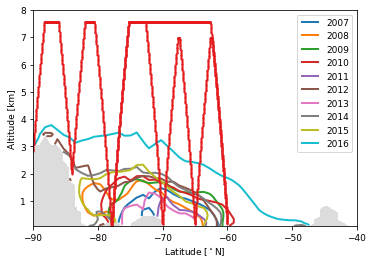

In [30]:
import plot_tools
import colorbrewer
import cmocean
from matplotlib.colors import LinearSegmentedColormap

mpl.rcParams['contour.negative_linestyle'] = 'solid'

v = 'CO2_OCN_detrended'

fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0.1,0.1,0.75,0.75])

#ax.minorticks_on()
#ax.tick_params(which='major',direction='out',width=1,  length=6)
#ax.tick_params(which='minor',direction='out',width=0.5,length=4)

cm = LinearSegmentedColormap.from_list(
        'white', [(1.,1.,1.),(1.,1.,1.)], N=1)

cf = ax.contourf(dshm.lat, dshm.zlev, dshm.SO_AIR.mean(dim='time'),
                 levels=levels,
                 cmap = cm, #'viridis',
                 extend='both')

cs = []
for l in range(len(dsm.time)):
    cs.append(ax.contour(dshm.lat, dshm.zlev, dshm[v].isel(time=l),
                            levels = np.array([-0.8]),
                            colors = 'C%d'%l,
                            linewidths = 2))
ax.legend([c.collections[0] for c in cs],['%d'%dshm['time.year'][l] for l in range(len(dshm.time))])

ax.set_facecolor('gainsboro')

color = colorbrewer.qualitative8y()
pl = plt.plot(df_chc2mcm.lat,df_chc2mcm.alt2/3.3/1000.,'.',markersize=2,color=color[0])
pl = plt.plot(df_mcm2spo.lat,df_mcm2spo.alt2/3.3/1000.,'.',markersize=2,color=color[0])

ax.set_xlim([-90.,-40.])
ax.set_ylim([dsh.zlev[-1],8.])

ax.set_xlabel('Latitude [$^\circ$N]')
ax.set_ylabel('Altitude [km]')


<xarray.DataArray 'Pi' (lev: 56, lat: 64)>
array([[ 0.43418 ,  0.43418 ,  0.43418 , ...,  0.43418 ,  0.43418 ,  0.43418 ],
       [ 0.535241,  0.535241,  0.535241, ...,  0.535241,  0.535241,  0.535241],
       [ 0.65622 ,  0.65622 ,  0.65622 , ...,  0.65622 ,  0.65622 ,  0.65622 ],
       ...,
       [ 8.253318,  7.944985,  7.746777, ..., 15.323951, 15.313636, 15.302547],
       [ 8.25206 ,  7.943656,  7.745403, ..., 15.324317, 15.313999, 15.302908],
       [10.286942, 10.071548,  9.933085, ..., 15.226317, 15.219111, 15.211365]])
Coordinates:
  * lev      (lev) float64 1.868 2.353 2.948 3.677 4.562 5.632 6.918 8.456 ...
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 -86.23 -85.29 -84.35 ...


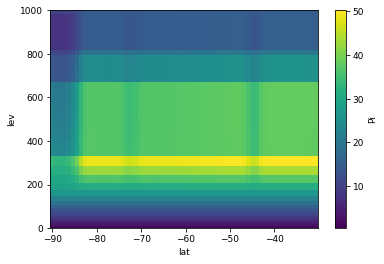

In [31]:
wp = dsm.Pi.diff(dim='ilev').mean('time').rename({'ilev':'lev'})
wp['lev'] = dsm.lev
wp.plot()
print(wp)

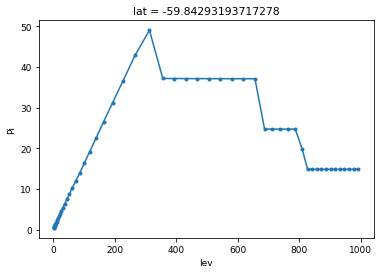

In [32]:
wp.sel(lat=-60,method='nearest').plot(marker='.')

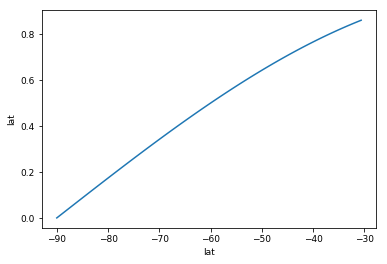

In [33]:
wl = np.cos(dsm.lat*np.pi/180.)
wl.plot()

<xarray.DataArray (lev: 56, lat: 64)>
array([[2.658586e-17, 7.141127e-03, 1.428032e-02, ..., 3.661304e-01,
        3.699192e-01, 3.736079e-01],
       [3.277406e-17, 8.803318e-03, 1.760425e-02, ..., 4.513521e-01,
        4.560227e-01, 4.605700e-01],
       [4.018188e-17, 1.079310e-02, 2.158329e-02, ..., 5.533697e-01,
        5.590960e-01, 5.646711e-01],
       ...,
       [5.053700e-16, 1.306743e-01, 2.547940e-01, ..., 1.292221e+01,
        1.304714e+01, 1.316770e+01],
       [5.052929e-16, 1.306524e-01, 2.547488e-01, ..., 1.292252e+01,
        1.304745e+01, 1.316801e+01],
       [6.298935e-16, 1.656507e-01, 3.267024e-01, ..., 1.283988e+01,
        1.296661e+01, 1.308924e+01]])
Coordinates:
  * lev      (lev) float64 1.868 2.353 2.948 3.677 4.562 5.632 6.918 8.456 ...
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 -86.23 -85.29 -84.35 ...


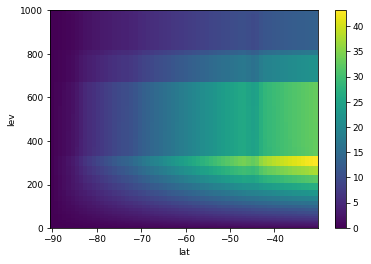

In [34]:
w = wp * wl
#np.testing.assert_allclose(w.sum(),1.)
print(w)
w.plot()

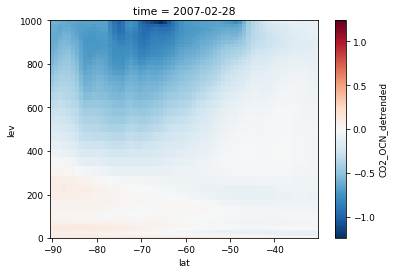

In [35]:
dsm['CO2_OCN_detrended'].isel(time=0).plot()

<xarray.DataArray (time: 3347)>
array([ 0.135882,  0.13511 ,  0.134336, ..., -8.71084 , -8.714019, -8.717197])
Dimensions without coordinates: time

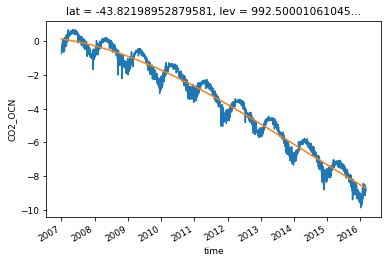

In [36]:

from scipy.optimize import curve_fit

#-- define the model
func = lambda t,mu,trend,trend2,trend3,amp1,phase1,amp2,phase2: (
    mu + trend * t + trend2 * t**2 + trend3 * t**3 + 
    amp1 * np.cos(1.*2.*np.pi*t + phase1) + 
    amp2 * np.cos(2.*2.*np.pi*t + phase2)) 

last_trend_parm = 4

def reference(v):
    x = (((ds.time - ds.time[0]) / np.timedelta64(1,'D')).astype(float).values)/365.
    y = ds[v].sel(lat=-30,lev=1000,method='nearest')

    abcd, pcov = curve_fit(func,x,y)
    abcd_nocycle = abcd.copy()
    abcd_nocycle[last_trend_parm:] = 0.
    
    return xr.DataArray(func(x,*abcd_nocycle),dims=('time'))


v = 'CO2_OCN'
y = ds[v].sel(lat=-44,lev=1000,method='nearest')
yref = reference(v)
y.plot()    
plt.plot(ds.time,yref)
yref

In [37]:
dsref = xr.Dataset()
for v in co2_vars:
    dsref[v] = ds[v] - reference(v)
dsref

<xarray.Dataset>
Dimensions:   (lat: 64, lev: 56, time: 3347)
Coordinates:
  * time      (time) datetime64[ns] 2007-01-01 2007-01-02 2007-01-03 ...
  * lat       (lat) float64 -90.0 -89.06 -88.12 -87.17 -86.23 -85.29 -84.35 ...
  * lev       (lev) float64 1.868 2.353 2.948 3.677 4.562 5.632 6.918 8.456 ...
    lon       float64 170.0
Data variables:
    CO2_OCN   (time, lev, lat) float64 -0.1318 -0.1318 -0.1318 -0.1318 ...
    CO2_T09   (time, lev, lat) float64 1.961 1.961 1.961 1.961 1.961 1.961 ...
    CO2_T09a  (time, lev, lat) float64 1.908 1.908 1.908 1.908 1.908 1.908 ...
    CO2_T09b  (time, lev, lat) float64 1.891 1.891 1.891 1.891 1.891 1.891 ...
    CO2_T09c  (time, lev, lat) float64 1.935 1.935 1.935 1.935 1.935 1.935 ...
    CO2_T09d  (time, lev, lat) float64 1.926 1.926 1.926 1.926 1.926 1.926 ...
    CO2_T09e  (time, lev, lat) float64 1.987 1.987 1.987 1.987 1.987 1.987 ...
    CO2_T09f  (time, lev, lat) float64 1.996 1.996 1.996 1.996 1.996 1.996 ...
    CO2_T09g  (time,

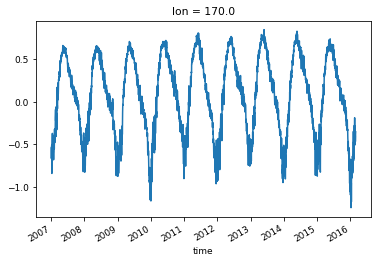

In [38]:
rgn_slice = {'lat':slice(-90,-44),'lev':slice(600.,1000.)}
def curtain_avg(v):
    wgt = w.copy()
    #wgt.values[:] = 1.
    return ((dsref[v] * wgt).sel(**rgn_slice) / wgt.sel(**rgn_slice).sum()).sum(dim=['lev','lat']) #[1:]

curtain_avg('CO2_OCN').plot()

In [39]:
year = np.unique(dsref['time.year'].values)
dsrefm = []
for y in year:
    nx = np.where((dsref['time.month']<=2)&(dsref['time.year']==y))[0]
    dsrefm.append(dsref.isel(time=nx).mean(dim='time'))   
    
dsrefm = xr.concat(dsrefm,dim='time')
dsrefm['time'] = ds.resample(time='A-Feb').mean().time

dsrefm.info()

xarray.Dataset {
dimensions:
	lat = 64 ;
	lev = 56 ;
	time = 10 ;

variables:
	datetime64[ns] time(time) ;
	float64 lat(lat) ;
		lat:long_name = latitude ;
		lat:units = degrees_north ;
	float64 lev(lev) ;
		lev:long_name = hybrid level at midpoints (1000*(A+B)) ;
		lev:units = hPa ;
		lev:positive = down ;
		lev:standard_name = atmosphere_hybrid_sigma_pressure_coordinate ;
		lev:formula_terms = a: hyam b: hybm p0: P0 ps: PS ;
	float64 CO2_OCN(time, lev, lat) ;
	float64 CO2_T09(time, lev, lat) ;
	float64 CO2_T09a(time, lev, lat) ;
	float64 CO2_T09b(time, lev, lat) ;
	float64 CO2_T09c(time, lev, lat) ;
	float64 CO2_T09d(time, lev, lat) ;
	float64 CO2_T09e(time, lev, lat) ;
	float64 CO2_T09f(time, lev, lat) ;
	float64 CO2_T09g(time, lev, lat) ;
	float64 CO2_T09h(time, lev, lat) ;
	float64 CO2_T09i(time, lev, lat) ;
	float64 CO2_T09j(time, lev, lat) ;
	float64 CO2_T09k(time, lev, lat) ;
	float64 CO2_T09l(time, lev, lat) ;
	float64 CO2_L14C(time, lev, lat) ;

// global attributes:
}

/glade/p/work/mclong/miniconda2/envs/py2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


0.9999999999999999
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     487.7
Date:                Tue, 08 May 2018   Prob (F-statistic):           2.51e-46
Time:                        08:36:29   Log-Likelihood:                 192.44
No. Observations:                 135   AIC:                            -380.9
Df Residuals:                     133   BIC:                            -375.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4812      0.008 

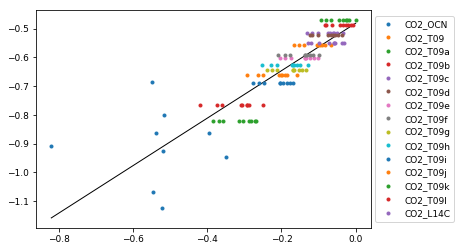

In [40]:
import statsmodels.api as sm
from scipy import stats

wO = 1./12.
wN = 2./12.
wD = 3./12.
wJ = 4./12.
wF = 2./12.
mon_wgt = np.array((wO,wN,wD,wJ,wF))
print(mon_wgt.sum())

rgn_slice = {'lat':slice(-90,-65),'lev':slice(400.,1000.)}
def curtain_avg(v):
    wgt = w.copy()
    #wgt.values[:] = 1.
    return ((dsrefm[v] * wgt).sel(**rgn_slice) / wgt.sel(**rgn_slice).sum()).sum(dim=['lev','lat'])[1:]


ds_flux_all = np.array([])
ds_cavg_all = np.array([])
for v in co2_vars:
    ds_flux = np.array([])
    ds_cavg = np.array([])

    ds_cavg = curtain_avg(v)
    ds_cavg_all = np.concatenate((ds_cavg_all,ds_cavg.values))
    for y in np.unique(ds['time.year'])[1:]:
        flux = (ds['SF'+v].sel(time=slice('%04d-10-01'%(y-1),'%04d-02-15'%(y))).groupby('time.month').mean()*mon_wgt).sum()
        ds_flux = np.concatenate((ds_flux,[flux.values]))
    ds_flux_all = np.concatenate((ds_flux_all,ds_flux))
    
    plt.plot(ds_cavg,ds_flux,'.',label=v)

plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))

y = ds_flux_all
x = ds_cavg_all

model = sm.OLS(y, sm.add_constant(x))
fitted = model.fit()

xhat = np.linspace(x.min(),x.max(),50)
yhat = fitted.predict(sm.add_constant(xhat))
yerr = y - fitted.predict(sm.add_constant(x))
xbar = np.mean(x)
n = len(x)
df = n - fitted.df_model - 1
t = stats.t.ppf(1.-0.025,df=df)

s_err = np.sum(np.power(yerr,2))
ci = t * np.sqrt((s_err/(n-2))*(1.0/n + (np.power((xhat-xbar),2) / 
((np.sum(np.power(xhat,2))) - n*(np.power(xbar,2))))))

plt.plot(xhat,yhat,'-',linewidth=1,color='k',zorder=-10)    

#print(fitted.params)
print(fitted.summary())

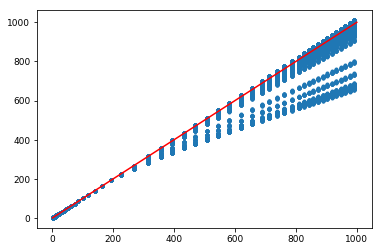

In [41]:
LEV = xr.DataArray(np.ones((len(dsm.time),len(dsm.lat))),dims=(u'time',u'lat')) * dsm.lev
LEV = LEV.transpose(*dsm.Pm.dims)
plt.plot(LEV.values.ravel(),dsm.Pm.values.ravel(),'.')
plt.plot([0,1000],[0,1000],'r-')

In [42]:
dsm.lev.values

array([  1.86788   ,   2.35259056,   2.94832105,   3.6765011 ,
         4.56168619,   5.63180097,   6.91832136,   8.45639175,
        10.28492069,  12.46014982,  15.05024964,  18.12434942,
        21.76100481,  26.04911011,  31.08890913,  36.99271008,
        43.90966147,  52.01590993,  61.49565801,  72.55785912,
        85.43901518, 100.51435977, 118.25000122, 139.11499828,
       163.66149894, 192.54101756, 226.51353758, 266.4790526 ,
       312.79157847, 356.25009984, 393.75010133, 431.25010282,
       468.75010431, 506.2501058 , 543.75010729, 581.25014603,
       618.75019222, 656.25016391, 687.50012293, 712.50009909,
       737.50009015, 762.49996573, 787.50003502, 810.000211  ,
       827.50016823, 842.50012413, 857.50004835, 872.49994837,
       887.49995828, 902.49991789, 917.49992315, 932.50008393,
       947.49998301, 962.4998027 , 977.49989989, 992.50001061])

In [43]:
w

<xarray.DataArray (lev: 56, lat: 64)>
array([[2.658586e-17, 7.141127e-03, 1.428032e-02, ..., 3.661304e-01,
        3.699192e-01, 3.736079e-01],
       [3.277406e-17, 8.803318e-03, 1.760425e-02, ..., 4.513521e-01,
        4.560227e-01, 4.605700e-01],
       [4.018188e-17, 1.079310e-02, 2.158329e-02, ..., 5.533697e-01,
        5.590960e-01, 5.646711e-01],
       ...,
       [5.053700e-16, 1.306743e-01, 2.547940e-01, ..., 1.292221e+01,
        1.304714e+01, 1.316770e+01],
       [5.052929e-16, 1.306524e-01, 2.547488e-01, ..., 1.292252e+01,
        1.304745e+01, 1.316801e+01],
       [6.298935e-16, 1.656507e-01, 3.267024e-01, ..., 1.283988e+01,
        1.296661e+01, 1.308924e+01]])
Coordinates:
  * lev      (lev) float64 1.868 2.353 2.948 3.677 4.562 5.632 6.918 8.456 ...
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 -86.23 -85.29 -84.35 ...